In [ ]:
#Import some basic libraries
import numpy as np
import pandas as pd

In [ ]:
#Read the data present in dataset
data = pd.read_csv('/content/kerala.csv')
#Using data.head() we can see the top 5 rows of the dataset
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [ ]:
#Now we will cheak if any colomns is left empty
data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [ ]:
#We want the data in numbers, therefore we will replace the yes/no in floods coloumn by 1/0
data['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)

In [ ]:
#Let's see how are data looks like now
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0


In [ ]:
#Now let's seperate the data which we are gonna use for prediction
x = data.iloc[:,1:14]
x.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2


In [ ]:
#Now seperate the flood label from the dataset
y = data.iloc[:, -1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: FLOODS, dtype: int64

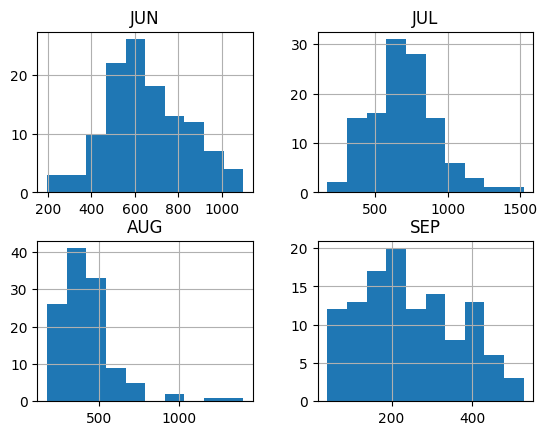

In [ ]:
#Let's see hoe the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

In [ ]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [ ]:
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
#Let's see how our train set looks like
x_train.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
117,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1
34,1935,23.9,8.3,18.1,120.7,56.6,431.3,687.3,280.9,283.3,403.8,153.0,30.9
35,1936,1.2,16.5,116.0,34.0,466.5,620.8,672.1,367.9,286.7,231.7,211.1,18.6
72,1973,0.0,0.3,12.3,131.5,119.9,617.0,583.5,487.5,61.3,260.8,84.5,53.8
110,2011,20.5,45.7,24.1,165.2,124.2,788.5,536.8,492.7,391.2,227.2,169.7,49.5


In [ ]:
y_train.head()

117    1
34     0
35     1
72     0
110    1
Name: FLOODS, dtype: int64

PREDICTION ALGORITHMS

1-KNN CLASSIFIER

In [ ]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [ ]:
#Let's predict chances of flood
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood
[0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1]


In [ ]:
#Actual chances of flood
print("actual values of floods:")
print(y_test)

actual values of floods:
104    1
6      1
96     1
105    1
103    0
37     0
92     0
113    1
97     1
41     1
52     0
77     1
94     0
18     1
95     0
11     1
58     1
42     1
13     0
0      1
69     0
16     0
50     0
49     1
Name: FLOODS, dtype: int64


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn_accuracy = cross_val_score(knn_clf,x_test,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [ ]:
knn_accuracy.mean()

0.2916666666666667

2. Logistic Regression

In [ ]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [ ]:

lr_accuracy.mean()

0.5

In [ ]:
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
print(y_predict)

Predicted chances of flood
[1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1]


In [ ]:
print('Actual chances of flood')
print(y_test.values)

Actual chances of flood
[1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1]


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score: %f"%(accuracy_score(y_test,y_predict)*100))
print("recall score: %f"%(recall_score(y_test,y_predict)*100))
print("roc score: %f"%(roc_auc_score(y_test,y_predict)*100))


accuracy score: 87.500000
recall score: 86.666667
roc score: 87.777778


3. Decision tree classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.71875   , 0.74193548, 0.61290323])

In [ ]:
#Predicted flood chances
y_pred = dtc_clf.predict(x_test)
print(y_pred)

[1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0]


In [ ]:
#Actual flood chances
print("actual values:")
print(y_test.values)

actual values:
[1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1]


In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:75.000000
recall score:78.571429
roc score:74.285714


4. Random Forest Classification¶

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf = rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
rmf_clf_acc = cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
#rmf_proba = cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [ ]:
rmf_clf_acc

array([0.6875    , 0.80645161, 0.80645161])

In [ ]:
y_pred = rmf_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,confusion_matrix
print("\naccuracy score:%f"%(accuracy_score(y_test,y_pred)*100))
print("recall score:%f"%(recall_score(y_test,y_pred)*100))
print("roc score:%f"%(roc_auc_score(y_test,y_pred)*100))


accuracy score:75.000000
recall score:78.571429
roc score:74.285714


5. Ensemble Learning

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()

voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')

In [ ]:
voting_clf = voting.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9166666666666666
RandomForestClassifier 0.7083333333333334
KNeighborsClassifier 0.875
VotingClassifier 0.9166666666666666


Comparing all the prediction models

In [ ]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Name     Score
0  KNN  0.875000
1   LR  0.958333
2   DT  0.750000
3   RF  0.833333
4   EL  0.916667


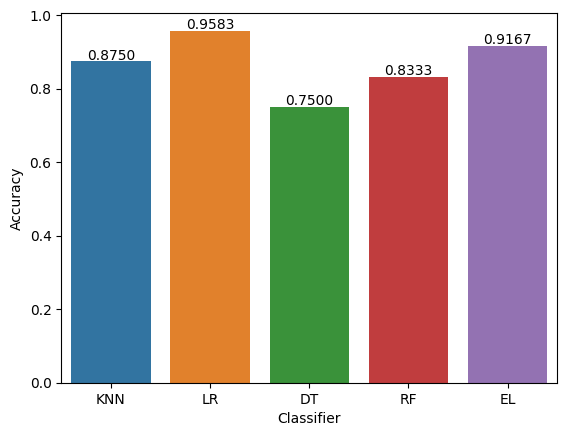

In [ ]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")

plt.show()